In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score,classification_report

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
data = pd.read_csv('Admission_Predict.csv')

In [7]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [12]:
# Check for null values in the dataset
null_values = data.isnull().sum().sum()

# Print the total number of null values
print(f"Total number of null values: {null_values}")


Total number of null values: 0


In [9]:
data['Chance of Admit '] = [1 if each > 0.75 else 0 for each in data['Chance of Admit ']]

In [10]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [12]:
data['Chance of Admit '].value_counts()

Chance of Admit 
0    228
1    172
Name: count, dtype: int64

In [13]:
x = data[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research' ]]

In [14]:
y = data['Chance of Admit ']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)

In [16]:
print("Size of split data")
print(f"x_train size: {x_train.shape}")
print(f"x_test size: {x_test.shape}")
print(f"y_train size: {y_train.shape}")
print(f"y_test size: {y_test.shape}")

Size of split data
x_train size: (300, 7)
x_test size: (100, 7)
y_train size: (300,)
y_test size: (100,)


In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)


In [42]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [43]:
y_pred = model.predict(x_train)

In [44]:
print("y_test length:", len(y_test))
print("y_pred length:", len(y_pred))


y_test length: 100
y_pred length: 300


In [46]:
y_pred = model.predict(x_test)

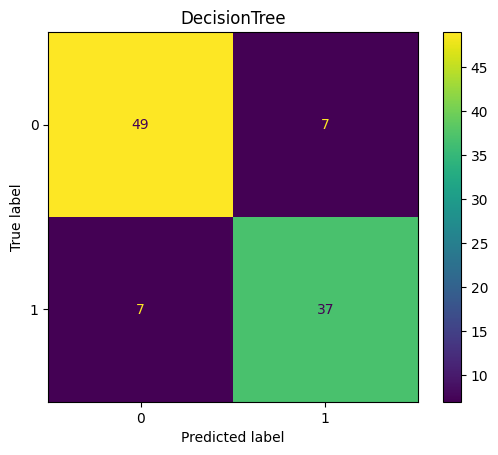

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('DecisionTree')
plt.show()

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
print("\t LOGISTIC REGRESSION \t")
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision is: ",precision_score(y_test, y_pred))
print("Recall Score:" , recall_score(y_test, y_pred))

	 LOGISTIC REGRESSION 	
Accuracy Score:  0.86
Precision is:  0.8409090909090909
Recall Score: 0.8409090909090909


In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# Assuming X_train, y_traimn, X_test, and y_test are already defined
svm_model = SVC()  # Initialize the model
svm_model.fit(x_train, y_train)  # Train the model

predictions_svm = svm_model.predict(x_test)  # Generate predictions

# Calculate metrics
print('\t support vector machine')
print("Accuracy Score: ", accuracy_score(y_test, predictions_svm))
print("Precision is: ", precision_score(y_test, predictions_svm))
print("Recall Score: ", recall_score(y_test, predictions_svm))
print("Recall Score: ", f1_score(y_test, predictions_svm))


	 support vector machine
Accuracy Score:  0.74
Precision is:  0.95
Recall Score:  0.4318181818181818
Recall Score:  0.59375


Decision Tree Classifier Performance:
Accuracy Score:  0.86
Precision is:  0.8409090909090909
Recall Score:  0.8409090909090909
F1 Score:  0.8409090909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        56
           1       0.84      0.84      0.84        44

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



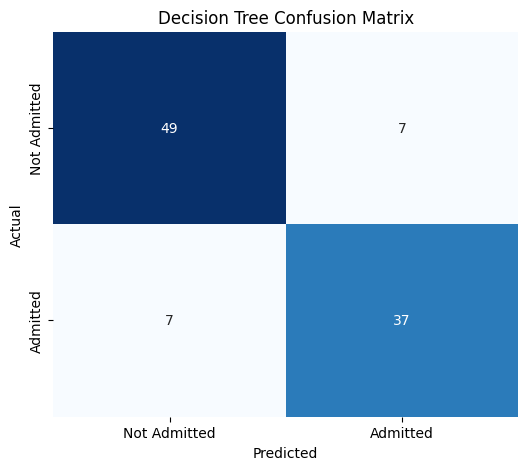

Support Vector Machine Performance:
Accuracy Score:  0.74
Precision is:  0.95
Recall Score:  0.4318181818181818
F1 Score:  0.59375
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.98      0.81        56
           1       0.95      0.43      0.59        44

    accuracy                           0.74       100
   macro avg       0.82      0.71      0.70       100
weighted avg       0.80      0.74      0.71       100



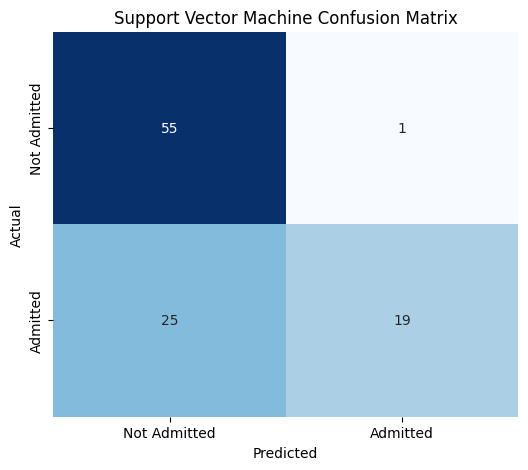

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming the preprocessing steps are done (null values, label encoding, etc.)
# Example of loading your dataset
data = pd.read_csv('Admission_Predict.csv')

# Transform the 'Chance of Admit' column to binary (1 if > 0.75, else 0)
data['Chance of Admit '] = [1 if each > 0.75 else 0 for each in data['Chance of Admit ']]

# Features (X) and target (y) variable
x = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = data['Chance of Admit ']

# Train-test split (75% train, 25% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

# Decision Tree Metrics
print("Decision Tree Classifier Performance:")
print("Accuracy Score: ", accuracy_score(y_test, y_pred_dt))
print("Precision is: ", precision_score(y_test, y_pred_dt))
print("Recall Score: ", recall_score(y_test, y_pred_dt))
print("F1 Score: ", f1_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix as a block (heatmap)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Support Vector Machine (SVM)
svm_model = SVC()  # You can tune the kernel if needed
svm_model.fit(x_train, y_train)
predictions_svm = svm_model.predict(x_test)

# SVM Metrics
print("Support Vector Machine Performance:")
print("Accuracy Score: ", accuracy_score(y_test, predictions_svm))
print("Precision is: ", precision_score(y_test, predictions_svm))
print("Recall Score: ", recall_score(y_test, predictions_svm))
print("F1 Score: ", f1_score(y_test, predictions_svm))
print("Classification Report:\n", classification_report(y_test, predictions_svm))

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, predictions_svm)

# Plot confusion matrix as a block (heatmap)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])
plt.title("Support Vector Machine Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
